# plotnine
- https://plotnine.org/changelog.html

In [2]:
#!pip install plotnine

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [6]:
mtcars2 = data('mtcars')

In [7]:
mtcars2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [36]:
from plotnine.data import mtcars, mpg

In [9]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
import plotnine as p9

In [59]:
gg1= p9.ggplot(mtcars, p9.aes(x='wt', y='mpg', color= 'factor(gear)')) + p9.geom_point() + p9.stat_smooth(method='lm') \
+ p9.facet_wrap('gear')
#plt.show()

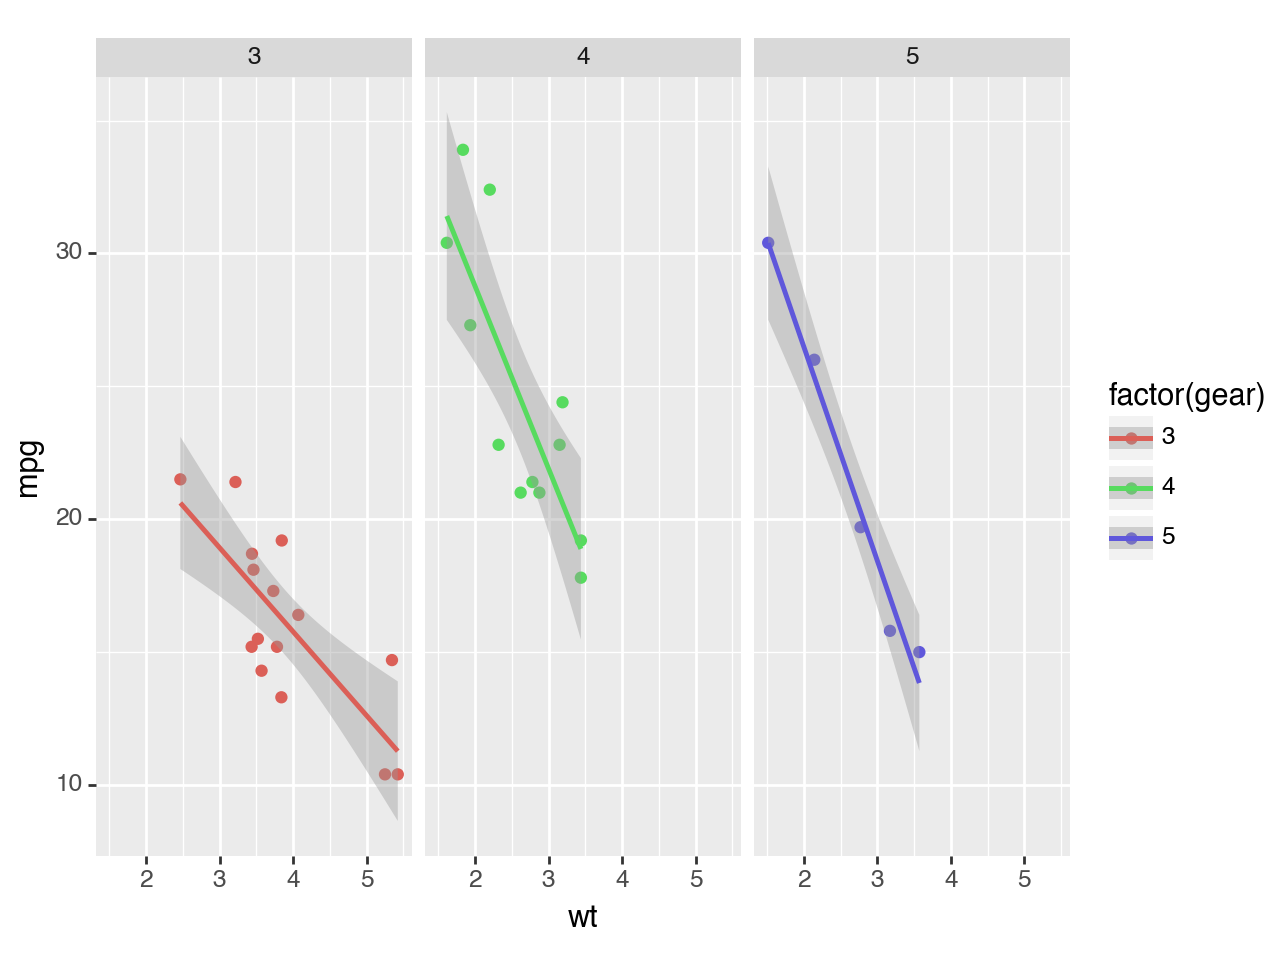

<Figure Size: (640 x 480)>

In [60]:
gg1

In [27]:
gg2 = p9.ggplot(mtcars, p9.aes("factor(cyl)", fill="factor(am)")) + p9.geom_bar(position="fill") \
+ p9.geom_text(p9.aes(label=p9.after_stat("count")), stat="count", position='fill')

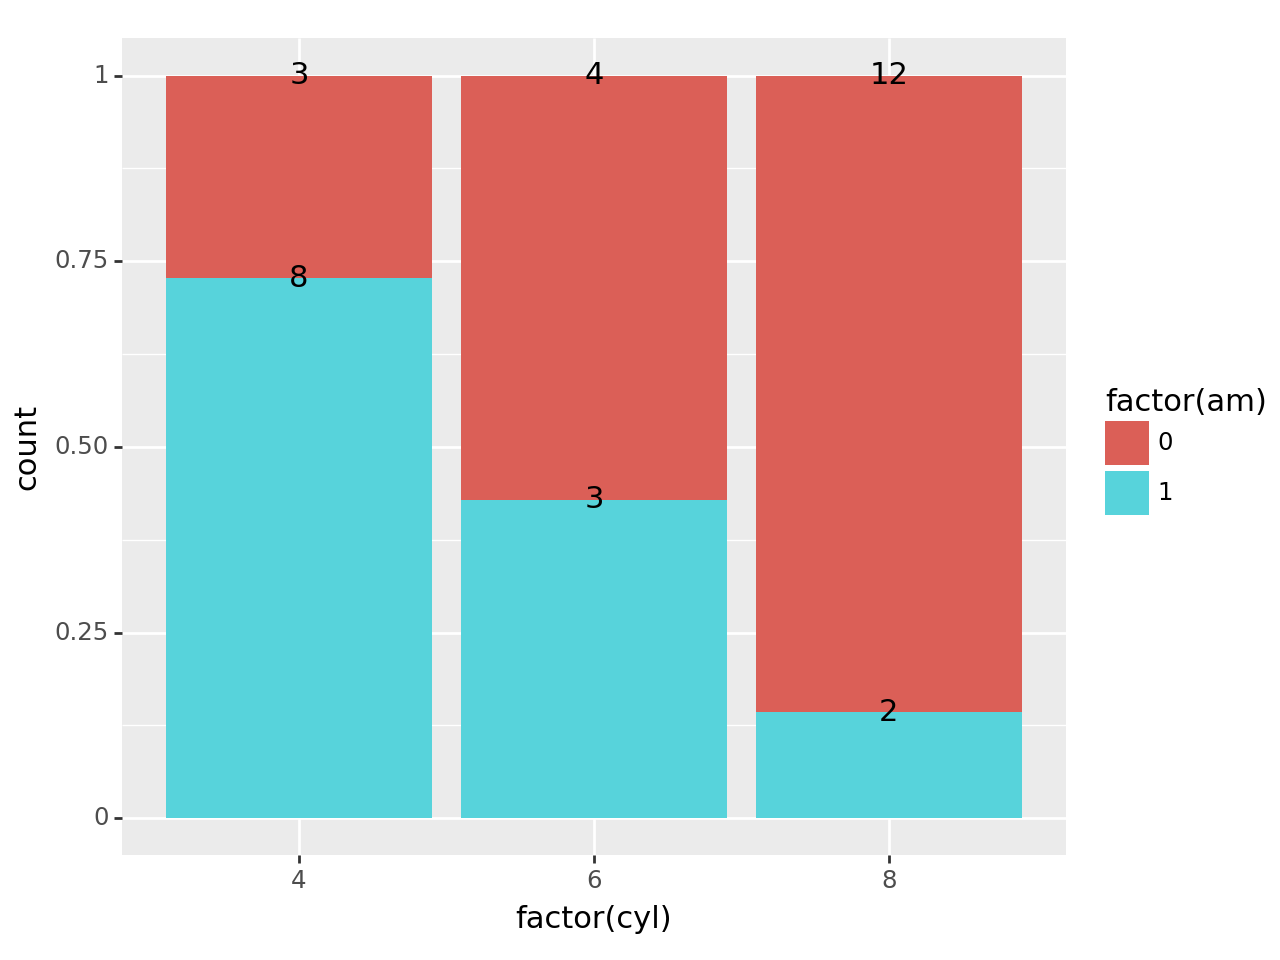

In [28]:
gg2.draw()

In [37]:
# car data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


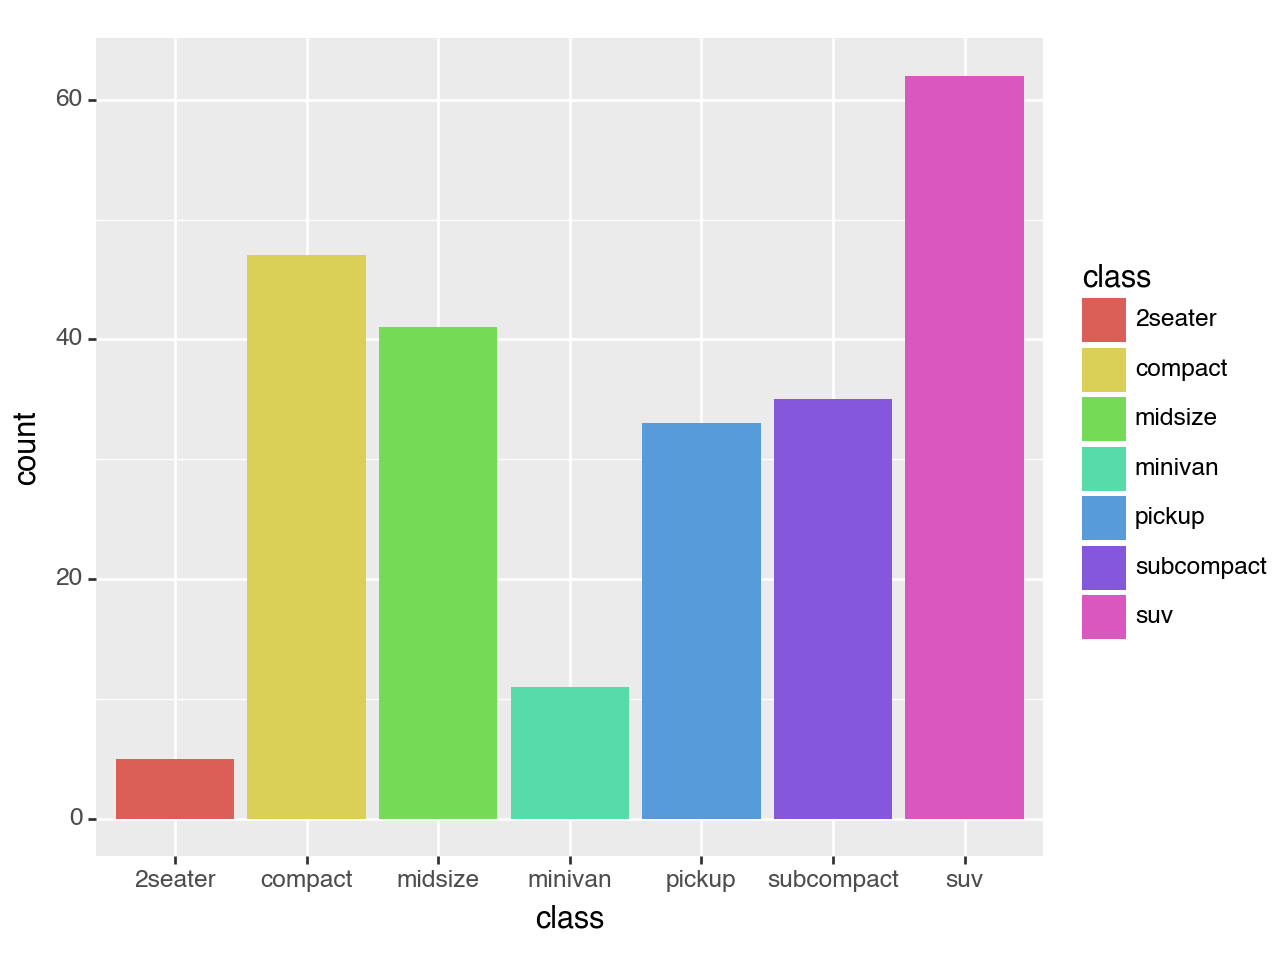

<Figure Size: (640 x 480)>

In [43]:
p9.ggplot(mpg, p9.aes(x='class', fill='class')) + p9.geom_bar() # + p9.geom_text(p9.aes(label=count))

In [29]:
import matplotlib.backends.backend_pdf

In [31]:
pdf = matplotlib.backends.backend_pdf.PdfPages('output.pdf')

with PdfPages(r'output.pdf') as export_pdf:
    export_pdf.savefig(gg2)

pdf.savefig(gg2.environment)

In [44]:
gg2.save('myggplot.pdf')

/Users/du/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/du/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: myggplot.pdf


In [65]:
p9.save_as_pdf_pages([gg1 + p9.theme(figure_size=(15,6)), gg2 + p9.theme(figure_size=(10,9))], filename='myggplot2.pdf' )

/Users/du/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:748: PlotnineWarning: Filename: myggplot2.pdf


In [58]:
def facet_pages(column):
    base_plot = [ p9.aes(x="wt", y="mpg", label="name"), p9.geom_text()]
    for label, group_data in mtcars.groupby(column):
        yield p9.ggplot(group_data) + base_plot + p9.ggtitle(label)

p9.save_as_pdf_pages(facet_pages('cyl'), filename='myggplot3.pdf')

/Users/du/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:748: PlotnineWarning: Filename: myggplot3.pdf
